In [2]:
from pysonnet.outputs import SYZParameter
import matplotlib.pyplot as plt
import numpy as np

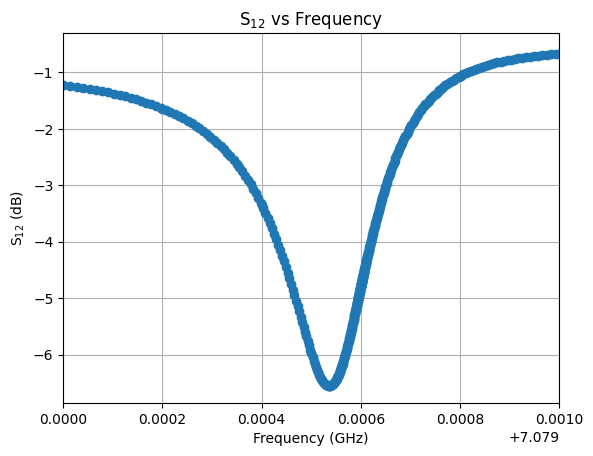

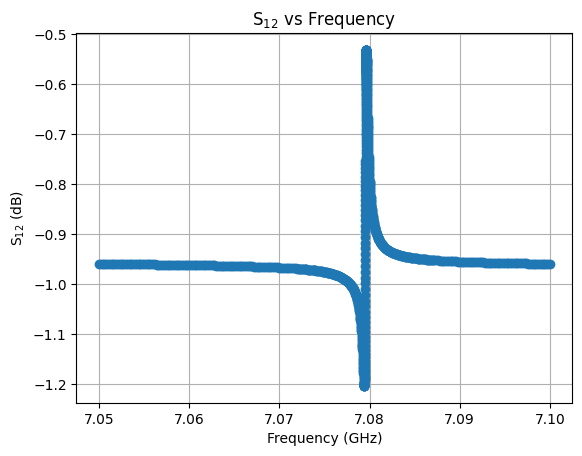

In [5]:
# read in the Touchstone file you just generated
sp = SYZParameter.from_touchstone(r"/Users/eesh/Documents/mcp_hackathon_2025/cqed-design-ai/fitting/cpw.s2p")
# :contentReference[oaicite:1]{index=1}

# frequencies (GHz) and the 2×2 S-matrix (complex) array
f = sp.f                       # shape (N,) in GHz
S = sp.value                   # shape (N, 2, 2)

# pick out S12 = measurement at port 1 due to excitation at port 2
s12 = S[:, 0, 1]

# plot magnitude in dB
plt.figure()
plt.plot(f, 20*np.log10(np.abs(s12)), marker='o')
plt.xlabel('Frequency (GHz)')
plt.ylabel('S$_{12}$ (dB)')
plt.title('S$_{12}$ vs Frequency')
plt.grid(True)
plt.xlim(7.0790, 7.08)
plt.show()

plt.plot(f, (np.angle(s12)), marker='o')
plt.xlabel('Frequency (GHz)')
plt.ylabel('S$_{12}$ (dB)')
plt.title('S$_{12}$ vs Frequency')
plt.grid(True)
plt.show()




In [7]:

from circle_fitting_code import *

Using circle fit to get initial fit parameters.
Fitting type = hanger
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 50
    # data points      = 848
    # variables        = 3
    chi-square         = 0.05429492
    reduced chi-square = 6.4254e-05
    Akaike info crit   = -8182.46200
    Bayesian info crit = -8168.23336
[[Variables]]
    theta0: -4.38144484 +/- 3.4837e-04 (0.01%) (init = -4.361894)
    Qtot:    24033.0039 +/- 15.4337272 (0.06%) (init = 707.8238)
    fr:      7.0796e+09 +/- 54.2390860 (0.00%) (init = 7.078238e+09)
[[Correlations]] (unreported correlations are < 0.100)
    C(theta0, fr) = -0.5885
    C(Qtot, fr)   = +0.3696
Qc = 47879.531865696685 +- 31.13882359432405

circle fit results:
xc = 4.539e-01 +- 3.643e-05
yc = -5.347e-01 +- 2.034e-05
rc = 2.310e-01 +- 1.883e-05

theta fit results:
theta0 = -4.381e+00 +- 3.484e-04
Qtot   = 2.403e+04 +- 1.543e+01
fr     = 7.079564243e+09 +- 5.424e+01

derived results:
alpha = -9.585e-01 +- 7.880e-05

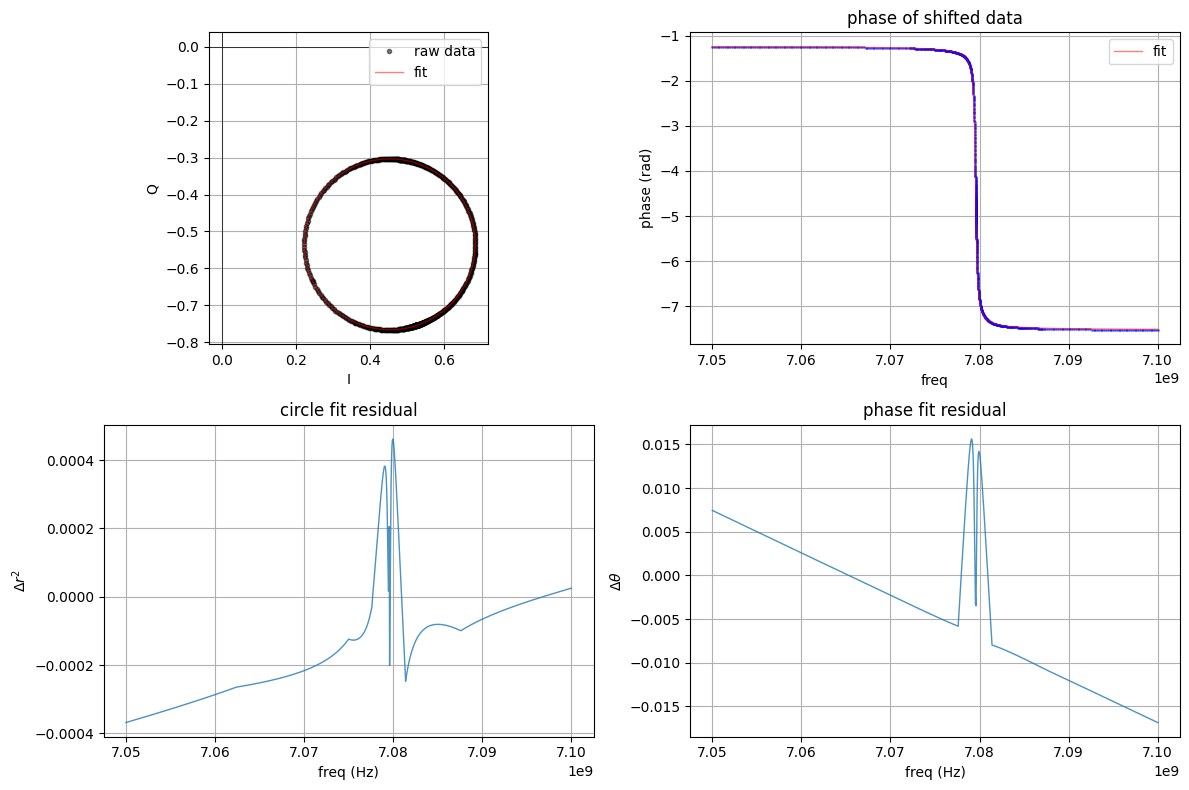

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skrf as rf
#import circlefit  # assuming the code you shared is saved as circlefit.py


# Load the S2P data
network = rf.Network(r"/Users/eesh/Documents/mcp_hackathon_2025/cqed-design-ai/fitting/cpw.s2p")

def perform_circle_fit(filepath, plot_folder_path=None):
    """
    Perform circle fitting on S-parameter data from a file.
    
    Parameters:
    - filepath: Path to the S2P file.
    - plot_folder_path: Optional path to save plots.
    
    Returns:
    - fitresults: Dictionary containing fit results.
    """
    # Load the S2P data
    network = rf.Network(filepath)

    # Extract frequency and S21 data
    freqs = network.f  # Frequency in Hz
    s21 = network.s[:, 1, 0]  # S21 parameter (assuming 2-port, 0-indexed)

    # Separate real and imaginary parts
    real_data = s21.real
    imag_data = s21.imag

    # Run the circle fit
    fitresults = circlefit(
        freqs=freqs,
        Xn=real_data, 
        Yn=imag_data,
        fittype='hanger',  # Change to 'hanger' or 'reflection' if needed based on your CPW design
        plotlabel='CPW Resonator',
        show_plots=True,
        print_results=True
    )

    # fit results format (['xc', 'xc_stderr', 'yc', 'yc_stderr', 'rc', 'rc_stderr', 'theta0', 'theta0_stderr', 'Qtot', 'Qtot_stderr', 'fr', 'fr_stderr', 'alpha', 'alpha_stderr', 'a', 'a_stderr', 'phi', 'phi_stderr', 'Qc', 'Qc_stderr', 'Qi', 'Qi_stderr'])

    # # Print out key resonator parameters
    # print("\nSummary of Key Parameters:")
    # print(f"Resonance Frequency: {fitresults['fr']/1e9:.6f} GHz")
    # print(f"Loaded Quality Factor (Q_L): {fitresults['Qtot']:.0f}")
    # print(f"Coupling Quality Factor (Q_c): {fitresults['Qc']:.0f}")
    # print(f"Internal Quality Factor (Q_i): {fitresults['Qi']:.0f}")

    # # You can also save the fit results to a file
    # np.save('cpw_fitresults.npy', fitresults)

    return fitresults
# Extract frequency and S21 data
freqs = network.f  # Frequency in Hz
s21 = network.s[:, 1, 0]  # S21 parameter (assuming 2-port, 0-indexed)



# Separate real and imaginary parts
real_data = s21.real
imag_data = s21.imag

# Run the circle fit
fitresults = circlefit(
    freqs=freqs,
    Xn=real_data, 
    Yn=imag_data,
    fittype='hanger',  # Change to 'hanger' or 'reflection' if needed based on your CPW design
    plotlabel='CPW Resonator',
    show_plots=True,
    print_results=True
)

# dict_keys(['xc', 'xc_stderr', 'yc', 'yc_stderr', 'rc', 'rc_stderr', 'theta0', 'theta0_stderr', 'Qtot', 'Qtot_stderr', 'fr', 'fr_stderr', 'alpha', 'alpha_stderr', 'a', 'a_stderr', 'phi', 'phi_stderr', 'Qc', 'Qc_stderr', 'Qi', 'Qi_stderr'])

# Print out key resonator parameters
print("\nSummary of Key Parameters:")
print(f"Resonance Frequency: {fitresults['fr']/1e9:.6f} GHz")
print(f"Loaded Quality Factor (Q_L): {fitresults['Qtot']:.0f}")
print(f"Coupling Quality Factor (Q_c): {fitresults['Qc']:.0f}")
print(f"Internal Quality Factor (Q_i): {fitresults['Qi']:.0f}")

# You can also save the fit results to a file
np.save('cpw_fitresults.npy', fitresults)

In [11]:
fitresults.keys()

dict_keys(['xc', 'xc_stderr', 'yc', 'yc_stderr', 'rc', 'rc_stderr', 'theta0', 'theta0_stderr', 'Qtot', 'Qtot_stderr', 'fr', 'fr_stderr', 'alpha', 'alpha_stderr', 'a', 'a_stderr', 'phi', 'phi_stderr', 'Qc', 'Qc_stderr', 'Qi', 'Qi_stderr'])